In [1]:
import numpy as np
import pandas as pd
import pymysql as mysql
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Adjust these credentials as needed
hostname = "team-shared-mysql.cjwa24wuisi8.us-east-1.rds.amazonaws.com"
portnum = 3306
username = "Ads507" 
password = "Gabrielleo24" 
database = "business_db" # or 'root', or whatever user you created
# replace with your real password
# or whatever DB name you used
conn = mysql.connect(
host=hostname,
port=portnum,
user=username,
passwd=password,
db=database
)
print("Successfully connected to database!")


Successfully connected to database!


In [3]:
tableNames = pd.read_sql_query("SHOW TABLES", conn)
print(tableNames)

  Tables_in_business_db
0              Employee
1               Product
2   PurchaseOrderDetail
3   PurchaseOrderHeader
4            ShipMethod
5                Vendor


In [4]:
# the numbers of actors in the database
productCount = pd.read_sql_query("SELECT COUNT(*) FROM Product", conn)
print(productCount)

   COUNT(*)
0       400


In [5]:
query_emp_jobtitle = """
SELECT JobTitle, COUNT(*) AS job_count
FROM Employee
GROUP BY JobTitle
ORDER BY job_count DESC;
"""

emp_jobtitle_df = pd.read_sql_query(query_emp_jobtitle, conn)
emp_jobtitle_df

,JobTitle,job_count
0,Purchasing Agent,40
1,Buyer,35
2,Purchasing Manager,26
3,Inventory Specialist,25
4,Logistics Coordinator,16
5,Supply Manager,16
6,Procurement Officer,15
7,Operations Analyst,14
8,Supply Chain Manager,13


In [6]:
query_product_price = """
SELECT 
  CASE 
    WHEN ListPrice < 50 THEN 'Low'
    WHEN ListPrice BETWEEN 50 AND 200 THEN 'Medium'
    ELSE 'High'
  END AS price_range,
  COUNT(*) AS product_count
FROM Product
GROUP BY price_range;
"""

product_price_df = pd.read_sql_query(query_product_price, conn)
product_price_df

,price_range,product_count
0,High,336
1,Low,12
2,Medium,52


In [7]:
query_vendor_status = """
SELECT 
  ActiveFlag,
  COUNT(*) AS vendor_count
FROM Vendor
GROUP BY ActiveFlag;
"""

vendor_status_df = pd.read_sql_query(query_vendor_status, conn)
vendor_status_df

,ActiveFlag,vendor_count
0,1,398
1,0,2


In [8]:
query_poheader_status = """
SELECT Status, COUNT(*) AS order_count
FROM PurchaseOrderHeader
GROUP BY Status;
"""

poheader_status_df = pd.read_sql_query(query_poheader_status, conn)
poheader_status_df

,Status,order_count
0,2,118
1,4,112
2,3,90
3,1,80


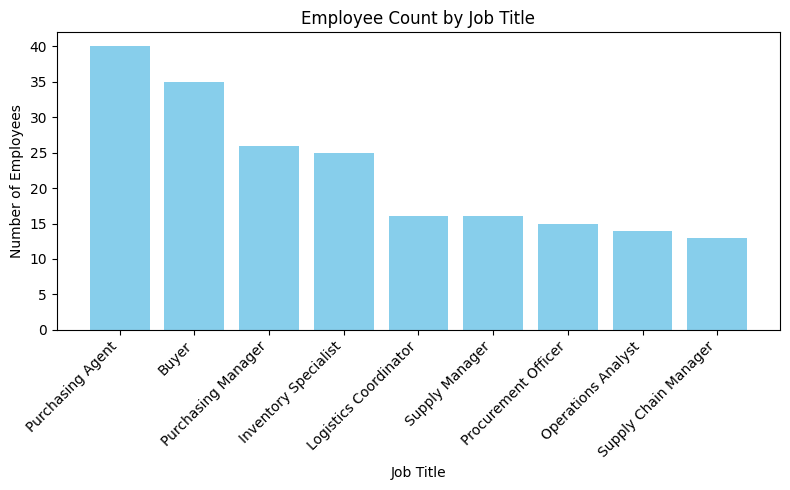

In [9]:
plt.figure(figsize=(8,5))
plt.bar(emp_jobtitle_df["JobTitle"], emp_jobtitle_df["job_count"], color="skyblue")
plt.xlabel("Job Title")
plt.ylabel("Number of Employees")
plt.title("Employee Count by Job Title")
plt.xticks(rotation=45, ha="right")  # rotate if job titles are long
plt.tight_layout()
plt.show()

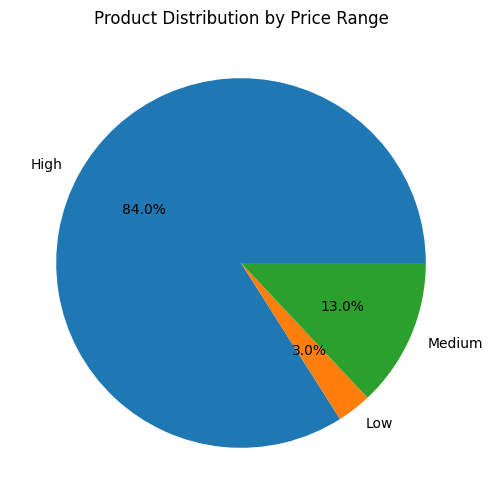

In [10]:
plt.figure(figsize=(6,6))
plt.pie(
    product_price_df["product_count"], 
    labels=product_price_df["price_range"], 
    autopct="%.1f%%"
)
plt.title("Product Distribution by Price Range")
plt.show()

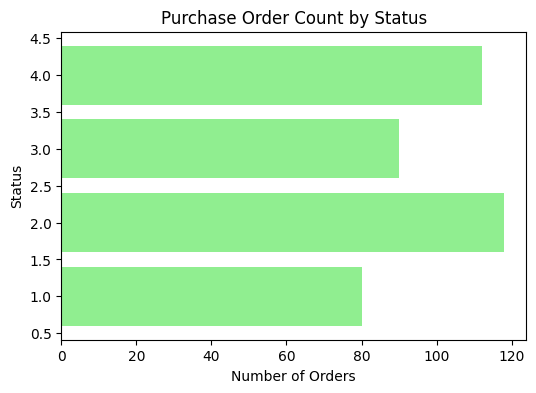

In [11]:
plt.figure(figsize=(6,4))
plt.barh(poheader_status_df["Status"], poheader_status_df["order_count"], color="lightgreen")
plt.xlabel("Number of Orders")
plt.ylabel("Status")
plt.title("Purchase Order Count by Status")
plt.show()